In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<div>
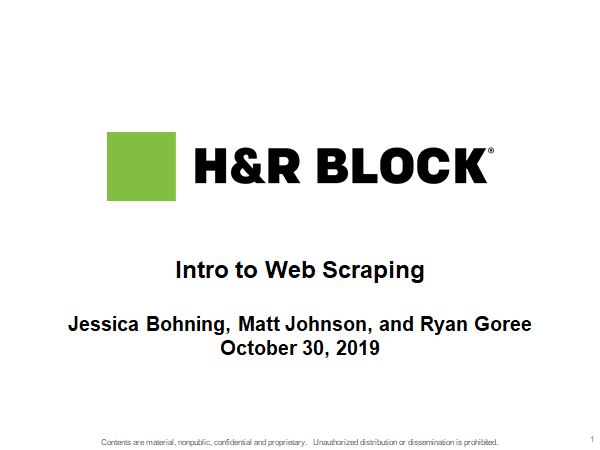
</div>

<div>
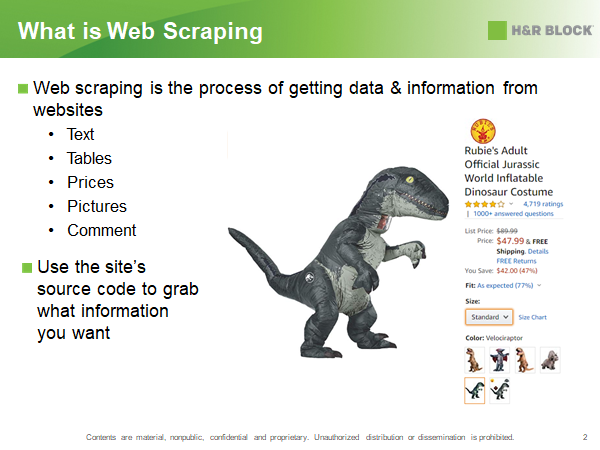
</div>

<div>
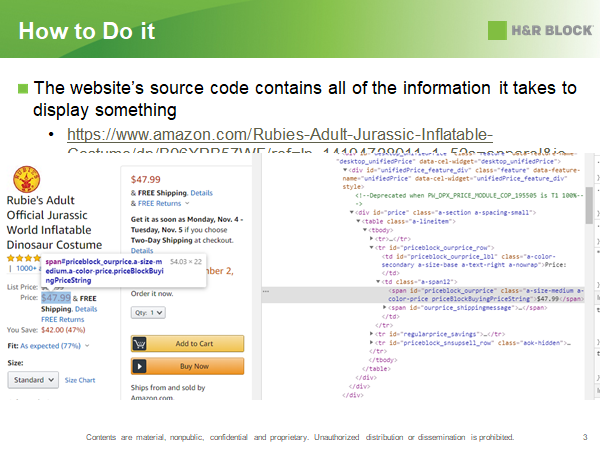
</div>

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Example: Dino Costume 
</div>

In [2]:
######
#Get Price of Amazon Dinosaur Costume
######

import requests
from bs4 import BeautifulSoup

#Define the url
url = "https://www.amazon.com/Rubies-Jurassic-Inflatable-Costume-Childs/dp/B00TO8QRC4/ref=cts_ap_1_vtp"

In [3]:
#Grab the node that contains the table
content = requests.get(url, verify=False).content
price = BeautifulSoup(content).select('#priceblock_ourprice')[0].text
price

C:\Users\A1030487\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\A1030487\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'$59.99'

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    HTML Overview
</div>

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Regular Expressions (Regex)
</div>

# Patterns used to extract specific information from strings

## Basic string search

In [4]:
full_text = "Hi, my name is Matt Johnson!"
full_text

'Hi, my name is Matt Johnson!'

In [5]:
name_list = full_text.split(' ')
name_list

['Hi,', 'my', 'name', 'is', 'Matt', 'Johnson!']

In [6]:
name = name_list[4] + ' ' + name_list[5]
name

'Matt Johnson!'

#### ...but what if we change the string a tiny bit:
- adding a word
- adding multiple names

## Regex string search

In [7]:
full_text = "Hi, my fake name is Matt Johnson! But my real name is Marv Swanson..."
full_text

'Hi, my fake name is Matt Johnson! But my real name is Marv Swanson...'

In [8]:
import re
pattern = r"real name is ([a-zA-Z^\s]+)"
re.findall(pattern, full_text)

['Marv Swanson']

#### ...this string search is a lot more resistant to changes and handles any number of "capture groups".

## Now let's try a simple webpage

In [9]:
website_source_code = """
<html>
    <head>
        <h3 style="background-color: #1C5253;color:#FFFFFF;">Matt's Names</h3>
    </head>
    <body>
        <div style="background-color: #C3EB78;">
            <br>
            <p class="name">Matt Johnson</p>
            <br>
            <p class="name">Marv Swanson</p>
            <br>
        </div>
    </body>
</html>
"""

In [10]:
from IPython.core.display import display, HTML
display(HTML(website_source_code))

In [11]:
import re
pattern = r'class="name">([^<]+)'
re.findall(pattern, website_source_code)

['Matt Johnson', 'Marv Swanson']

This site makes figuring out regular expression patterns really easy:
<a href="https://regexr.com/">https://regexr.com/</a>

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Simple Scraping Example: Routing Numbers
</div>

### Mad Cow had routing numbers in his data, but he wanted to group by bank for his report.
### He found this site that lets you search routing numbers: <a href="https://www.usbanklocations.com/crn.php?q=101089742">https://www.usbanklocations.com/crn.php?q=10108974</a>.
### But who wants to copy and paste thousands of unique routing numbers?
<hr>

#### Step 1: Import Python libraries

In [12]:
import requests
import re
from pprint import pprint

#### Step 2: Make call to website

In [13]:
routing_number = '10108974'
website_source_code = requests.get(f'https://www.usbanklocations.com/crn.php?q={routing_number}')
website_source_code

<Response [200]>

#### Step 3: Convert call response code into text

In [14]:
website_text = website_source_code.content.decode("utf-8") 
website_text

'<div class="ublcrnright"><b>"101089742"</b> is the routing number that contains "10108974".</div><div class="ublcrnheader">The following is the detail information of the bank</div><div class="ublcrnsubheader">FedACH Routing</div><table class="ublcrndetail"><tr><td><b>Name:</b></td><td><a href="https://www.usbanklocations.com/axos-bank.shtml">Axos Bank</a></td></tr><tr><td valign="top"><b>Address:</b></td><td><div>#140</div><div>San Diego, CA 92122</div></td></tr><tr><td><b>Phone:</b></td><td>888-687-4722</td></tr><tr><td><b>Type:</b></td><td>Main Office</td></tr><tr><td><b>Servicing Fed\'s Main Office :</b></td><td><a href="https://www.usbanklocations.com/routing-number-101000048.html">101000048</a></td></tr><tr><td><b>Status:</b></td><td>Active</td></tr><tr><td><b>Change Date:</b></td><td>10/30/2018</td></tr></table><br><div class="ublcrnsubheader">Fedwire Routing</div><div>Routing Number 101089742 doesn\'t process Fedwire Payments.</div><div><br>*The information for this routing num

#### Step 4: Identify a pattern and regex (perhaps using regexr.com)

#### Step 5: Extract the data

In [15]:
pattern = r'Name:<\/b><\/td><td>[^>]+>([^<]+)<'
result = re.findall(pattern, website_text)[0]
result

'Axos Bank'

#### Step 6: Store in a dictionary for easy lookup

In [16]:
results_dict = {routing_number: {'URL': website_source_code.url,
                                'Code': website_text,
                                'Name': result}}
pprint(results_dict)

{'10108974': {'Code': '<div class="ublcrnright"><b>"101089742"</b> is the '
                      'routing number that contains "10108974".</div><div '
                      'class="ublcrnheader">The following is the detail '
                      'information of the bank</div><div '
                      'class="ublcrnsubheader">FedACH Routing</div><table '
                      'class="ublcrndetail"><tr><td><b>Name:</b></td><td><a '
                      'href="https://www.usbanklocations.com/axos-bank.shtml">Axos '
                      'Bank</a></td></tr><tr><td '
                      'valign="top"><b>Address:</b></td><td><div>#140</div><div>San '
                      'Diego, CA '
                      '92122</div></td></tr><tr><td><b>Phone:</b></td><td>888-687-4722</td></tr><tr><td><b>Type:</b></td><td>Main '
                      "Office</td></tr><tr><td><b>Servicing Fed's Main Office "
                      ':</b></td><td><a '
                      'href="https://www.usbankloc

#### Step 7: Put code in a loop for run for all routing numbers

In [17]:
import requests
import re

routing_numbers = ['10108974', '111900659', '111000025']
results_dict = {}
for routing_number in routing_numbers:
    website_source_code = requests.get(f'https://www.usbanklocations.com/crn.php?q={routing_number}')
    website_text = website_source_code.content.decode("utf-8") 
    pattern = r'Name:<\/b><\/td><td>[^>]+>([^<]+)<'
    result = re.findall(pattern, website_text)[0]
    results_dict[routing_number] = {'URL': website_source_code.url,
                                    'Code': website_text[:50],
                                    'Name': result}
pprint(results_dict)

{'10108974': {'Code': '<div class="ublcrnright"><b>"101089742"</b> is the',
              'Name': 'Axos Bank',
              'URL': 'https://www.usbanklocations.com/crn.php?q=10108974'},
 '111000025': {'Code': '<div class="ublcrnright">111000025 is valid bank r',
               'Name': 'Bank Of America, N.a.',
               'URL': 'https://www.usbanklocations.com/crn.php?q=111000025'},
 '111900659': {'Code': '<div class="ublcrnright">111900659 is valid bank r',
               'Name': 'Wells Fargo Bank',
               'URL': 'https://www.usbanklocations.com/crn.php?q=111900659'}}


#### Step 7: Save website text and results to CSV

In [18]:
import pandas as pd

results_df = pd.DataFrame.from_dict(results_dict, orient='index')
results_df.to_csv('results.csv')
# results_df.to_sql('scraping_results_table', spark_connection)
results_df

URL  \
10108974   https://www.usbanklocations.com/crn.php?q=1010...   
111000025  https://www.usbanklocations.com/crn.php?q=1110...   
111900659  https://www.usbanklocations.com/crn.php?q=1119...   

                                                        Code  \
10108974   <div class="ublcrnright"><b>"101089742"</b> is...   
111000025  <div class="ublcrnright">111000025 is valid ba...   
111900659  <div class="ublcrnright">111900659 is valid ba...   

                            Name  
10108974               Axos Bank  
111000025  Bank Of America, N.a.  
111900659       Wells Fargo Bank

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Using Scraping Packages: Misspelled States
</div>

In [19]:
####################

#This code navigates to the web page on 
#with the most common misspellings of
#US states, then grabs the table
#and saves it off

####################

#install the requests, BeautifulSoup, and pandas package if you havent already

#load the rvest library
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
#Definte the url
url = "https://offices.net/misspelled-state-names.htm"

#Grab the node that contains the table
content = requests.get(url, verify=False).content
states = BeautifulSoup(content).find('table').find_all('tr')
states = [s.text.strip() for s in states]
states = [s.split('\n') for s in states]
states[:5]

C:\Users\A1030487\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[['A'],
 ['Alabama', 'Commonly misspelled as Allabama'],
 ['Alabama', 'Commonly misspelled as Alabamma'],
 ['Alaska', 'Commonly misspelled as Alsaka'],
 ['Arizona', 'Commonly misspelled as Arizonia']]

In [21]:
#Convert 'states' to dataframe
#It is currently a list
states = pd.DataFrame(states)

#View data
states.head()

0                                1
0        A                             None
1  Alabama  Commonly misspelled as Allabama
2  Alabama  Commonly misspelled as Alabamma
3   Alaska    Commonly misspelled as Alsaka
4  Arizona  Commonly misspelled as Arizonia

In [22]:
#Save data
states.to_csv("state_misspellings.csv")

In [23]:
#############################################
#OPTIONAL: you can clean up the data
#############################################
#Create new data set that we can clean
states_edited = states.copy()

In [24]:
#Rename the columns
states_edited.columns = ["state","misspelling"]
states_edited.head()

state                      misspelling
0        A                             None
1  Alabama  Commonly misspelled as Allabama
2  Alabama  Commonly misspelled as Alabamma
3   Alaska    Commonly misspelled as Alsaka
4  Arizona  Commonly misspelled as Arizonia

In [25]:
#Each row in column 2 contains the same phrase. 
#Remove that string from all rows
states_edited['misspelling'] = states_edited['misspelling'].str.replace("Commonly misspelled as ", "")
states_edited.head()

state misspelling
0        A        None
1  Alabama    Allabama
2  Alabama    Alabamma
3   Alaska      Alsaka
4  Arizona    Arizonia

In [26]:
#Some rows have just one letter (these were headings
#in the original table). Remove rows with just one character
states_edited = states_edited.loc[states_edited['state'].str.len() > 1, :]
states_edited.head()

state misspelling
1  Alabama    Allabama
2  Alabama    Alabamma
3   Alaska      Alsaka
4  Arizona    Arizonia
5  Arizona     Arzinoa

In [27]:
#Save cleaned data off
states_edited.to_csv("state_misspellings_cleaned.csv")

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Javascript Example: TurboTax.com
</div>

#### Let's try scraping Turbo's prices at https://turbotax.intuit.com/personal-taxes/online/. It's a bit tricky to find a unique selector. However, the "Header-module__price--3lEJm" class looks like a good bet.
#### Using a basic web request only gets us part of the site - the part you get when you "view source". However, we need the version of the site's code that you get from "inspect". What's the difference?
#### Javascript. It's a language that runs in your browser as opposed to the website's server. It dynamically generates HTML code. This means that if you hit the site with a basic Python call, it's not running through a browser, so the Javascript doesn't run, and the dynamic HTML isn't generated. Fortunately, Selenium lets you simulate a web browser in Python and run the Javascript.
#### First, let's take a look at the basic web request. Run the code then search for the class. Does it show the actual price?

In [28]:
import requests

website_source_code = requests.get('https://turbotax.intuit.com/personal-taxes/online/')

website_text = website_source_code.content.decode("utf-8")

website_text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n    \n\n    \n\n    \n        \n    \n    \n        \n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n    \n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n    \n    \n\n\n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n    \n\n    \n\n    \n        \n    \n    \n        \n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n    \n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n    \n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n 

#### Now let's use Selenium to simulate a browser and try again:

In [29]:
import time
from selenium import webdriver

# Make call
driver = webdriver.Chrome()
driver.get("https://turbotax.intuit.com/personal-taxes/online/")
elements = driver.find_elements_by_css_selector('.Header-module__title--3JWMg')
print(f'{len(elements)} elements found')
for element in elements:
    print(element.text)
driver.close()

4 elements found
Free Edition
Deluxe
Premier
Self-Employed


<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Wayback Machine
</div>

In [30]:
#Using Wayback Machine to Get old TurboTax Pricing data
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Block insecure request warnings - they're just annoying in loops
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [31]:
#Get array of urls
startdate = "2007/02/11"
number_of_days = 14

#First Get a List of Dates
datelist = pd.date_range(start=startdate, periods=number_of_days-1)
datelist

DatetimeIndex(['2007-02-11', '2007-02-12', '2007-02-13', '2007-02-14',
               '2007-02-15', '2007-02-16', '2007-02-17', '2007-02-18',
               '2007-02-19', '2007-02-20', '2007-02-21', '2007-02-22',
               '2007-02-23'],
              dtype='datetime64[ns]', freq='D')

In [32]:
#Format those dates like "201701011" (like the website did)
#This will be used to construct the urls
datelist_e = datelist.astype(str)
datelist_e = datelist_e.str.replace('-', '')
datelist_e

Index(['20070211', '20070212', '20070213', '20070214', '20070215', '20070216',
       '20070217', '20070218', '20070219', '20070220', '20070221', '20070222',
       '20070223'],
      dtype='object')

In [33]:
#Format as a url
url_list = "https://web.archive.org/web/" + datelist_e + "/https://turbotax.intuit.com/"
url_list

Index(['https://web.archive.org/web/20070211/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070212/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070213/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070214/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070215/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070216/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070217/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070218/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070219/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070220/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070221/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070222/https://turbotax.intuit.com/',
       'https://web.archive.org/web/20070223/https://turbotax.intuit.com/'],
      dtype

In [34]:
#Scrape data - go through each webpage
scraped_data = pd.DataFrame()
for i in range(len(url_list)):
    scraping = requests.get(url_list[i], verify=False).content
    products = [i.select('h3')[0].text for i in BeautifulSoup(scraping).select('div.producthead')]
    prices = [i.text for i in BeautifulSoup(scraping).select('em')]
    products = ["error-missing data"] if len(products) == 0 else products
    prices = ["error-missing data"] if len(prices) == 0 else prices
    index = None if len(products) > 1 else [0]
    scraped_data = scraped_data.append(pd.DataFrame({'Date': datelist[i], 
                                                     'Products': products, 
                                                     'Prices': prices}, index=index))
scraped_data

Date            Products                                        Prices
0 2007-02-11               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-11              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-11             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-11     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-12               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-12              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-12             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-12     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-13               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-13              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-13             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-13     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-14               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-14              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-14             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-14     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-15               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-15              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-15             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-15     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-16               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-16              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-16             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-16     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-17               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-17              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-17             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-17     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-18               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-18              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-18             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-18     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-19               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-19              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-19             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-19     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-20               Basic  \n\t\n\t\t\t\n\t\t\t\t$14.95\n\t\t\t\n\t\t\n
1 2007-02-20              Deluxe  \n\t\n\t\t\t\n\t\t\t\t$29.95\n\t\t\t\n\t\t\n
2 2007-02-20             Premier  \n\t\n\t\t\t\n\t\t\t\t$49.95\n\t\t\t\n\t\t\n
3 2007-02-20     Home & Business  \n\t\n\t\t\t\n\t\t\t\t$74.95\n\t\t\t\n\t\t\n
0 2007-02-21  error-missing data                            error-missing data
0 2007-02-22  error-missing data                            error-missing data
0 2007-02-23  error-missing data                            error-missing data

In [35]:
scraped_data_edited = scraped_data.copy()

scraped_data_edited.to_csv("turbo_pricing.csv")

##############################################
#OPTIONAL: CLEAN DATA
##############################################
scraped_data_edited.columns = ["Date","Products","Prices"]

#Clean up pricing: remove \n and \t
scraped_data_edited['Prices'] = scraped_data_edited['Prices'].str.replace("\n|\t", "")
scraped_data_edited.head()

Date         Products  Prices
0 2007-02-11            Basic  $14.95
1 2007-02-11           Deluxe  $29.95
2 2007-02-11          Premier  $49.95
3 2007-02-11  Home & Business  $74.95
0 2007-02-12            Basic  $14.95

In [36]:
#format as numeric: remove dollar sign first
scraped_data_edited['Prices'] = pd.to_numeric(scraped_data_edited['Prices'].str.replace("\\$", ""), errors='coerce')
scraped_data_edited.tail()

Date            Products  Prices
2 2007-02-20             Premier   49.95
3 2007-02-20     Home & Business   74.95
0 2007-02-21  error-missing data     NaN
0 2007-02-22  error-missing data     NaN
0 2007-02-23  error-missing data     NaN

In [37]:
#Save Data
filename = f"wayback_machine_{startdate.replace('/', '-')}_{number_of_days}.csv"
scraped_data_edited.to_csv(filename)

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    Saving Pages as Images
</div>

#### Source: https://medium.com/@ronnyml/website-screenshot-generator-with-python-593d6ddb56cb

In [38]:
# Install selenium (this runs things on the command line basically)
!pip install selenium

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),)) - skipping


#### Download web driver from https://sites.google.com/a/chromium.org/chromedriver/downloads (get chrome version from https://www.whatismybrowser.com/)
#### Put .exe file in one of the directories in your "path"
#### To see the path, use "import os" then "os.environ['PATH']"

In [39]:
# Source: https://stackoverflow.com/questions/41721734/take-screenshot-of-full-page-with-selenium-python-with-chromedriver
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Set options
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--start-maximized')

# Make call
driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.spotify.com")

# Get element with longest height on page
ele=driver.find_element_by_tag_name('body')
total_height = ele.size["height"]+9000

# Save full window
driver.set_window_size(1920, total_height)
driver.save_screenshot("screenshot.png")
driver.quit()

<div style="padding:20px;border-radius:10px;background-color:#1C5253;color:#FFFFFF;font-size:20px;font-weight:bold;">
    API's: Why Matt Rarely Scrapes Anymore
</div>

### An API is basically a part of the website intentionally designed and structured to be read by software instead of humans. Most reasonably-professional sites and services these days have an API that exposes their core services or data.

### There are many benefits to using API's vs scraping:
- <b>Ease:</b> API data is almost always exposed in formats that are really easy to iterate through - like CSV, JSON, or XML.
- <b>Stability:</b> API's don't change nearly as much as the human-friendly UI's, so your code that calls them doesn't have to change as much. They're designed by developers for developers, so things like backwards compatibility and simplicity are high priorities.
- <b>Speed:</b> API's usually expose only a small amount of data for each URL, while scraping forces the site to render the whole page, with a bunch of bloat that you don't care about.
- <b>Legality/Professionalism:</b> Scraping is usually a kind of gray area legally, and it's almost never the intended function of a human-friendly website. It puts unpredictable, unnecessarily large and hard-to-manage loads on the site - like a Denial of Service attack. In my early years, I once brought a small site down by not respecting rate limits. API's, on the other hand, let site owners manage these loads better (e.g., putting it on different servers, enforing "rate limits", etc.). So it's better to use API's as a matter of legal or professional courtesy, as well.

### There are costs, of course:
- <b>Data Availability/Timeliness:</b> API's often require developers to write special code, so they end up lower on development priorities for updates. This means not all data on a site will be in the API. On the other hand, some sites actually interact with their databases using only their own API's. And the reason you're using that site is usually for its core product, which is usually the first thing to be exposed via API. So this isn't usually a big deal.
- <b>Service Availability/Speed:</b> API's often run on different hardware assigned to handle "bot traffic", which gets less funding from the business, so it may be slower or less reliable.
- <b>Rate Limits:</b> Related to the service comment above, API's usually have a "rate limit" - the number of times you can hit it per second/minute/day, which restricts the amount of data you can pull. However, I've found most of these limits to be reasonable, and I prefer to know how much load I can put on them as opposed to basically attacking their website.

## At the end of the day, they've done a lot of work to provide us with value. As much as possible, we should honor that.

## Recipes

#### Check out these recipes: https://www.edamam.com/recipes/chocolate+chip+cookies
#### We could scrape all these, or just sign up for the API here: https://developer.edamam.com/

In [40]:
import json
import requests

response = requests.get('https://api.edamam.com/search', params={'q':'chocolate chip cookies',
                                                                'app_id': '51fb0720',
                                                                'app_key': '3399b276d3e052508d547824ec368717'},
                       verify=False)
print(response.url)
response_content = response.content.decode('utf-8')
response_json = json.loads(response_content)
response_json

https://api.edamam.com/search?q=chocolate+chip+cookies&app_id=51fb0720&app_key=3399b276d3e052508d547824ec368717


{'q': 'chocolate chip cookies',
 'from': 0,
 'to': 10,
 'params': {'sane': [],
  'q': ['chocolate chip cookies'],
  'app_key': ['3399b276d3e052508d547824ec368717'],
  'app_id': ['51fb0720']},
 'more': True,
 'count': 17363,
 'hits': [{'recipe': {'uri': 'http://www.edamam.com/ontologies/edamam.owl#recipe_20a688bb88eafc12fb9df4fdaabebc5e',
    'label': 'Chocolate Chip Cookies With Marshmallows and Pistachios',
    'image': 'https://www.edamam.com/web-img/118/11809ae4e6eb3adad7b5c50097959288.jpg',
    'source': 'Real Simple',
    'url': 'https://www.realsimple.com/food-recipes/browse-all-recipes/chocolate-chip-cookies-marshmallows',
    'shareAs': 'http://www.edamam.com/recipe/chocolate-chip-cookies-with-marshmallows-and-pistachios-20a688bb88eafc12fb9df4fdaabebc5e/chocolate+chip+cookies',
    'yield': 1.0,
    'dietLabels': ['Low-Sodium'],
    'healthLabels': ['Kidney-Friendly',
     'Peanut-Free',
     'Soy-Free',
     'Fish-Free',
     'Shellfish-Free',
     'Alcohol-Free'],
    'cautio

In [41]:
for recipe in response_json['hits']:
    print(recipe['recipe']['label'])
    print(recipe['recipe']['uri'])
    for ingredient in recipe['recipe']['ingredients']:
        print(ingredient['text'])
    print('\n\n')

Chocolate Chip Cookies With Marshmallows and Pistachios
http://www.edamam.com/ontologies/edamam.owl#recipe_20a688bb88eafc12fb9df4fdaabebc5e
2  marshmallows
2  chewy chocolate chip cookies
1 tablespoon chopped salted roasted pistachios



Chocolate Chip Cookies & Cream Ice Cream recipes
http://www.edamam.com/ontologies/edamam.owl#recipe_607645073bfaec425a51a4fe817d169a
2 cups heavy cream, divided
1 cup whole milk
2/3 cup granulated sugar
pinch salt
4 egg yolks
1 teaspoon vanilla extract
6 ounces (about 5 large) chocolate chip cookies, crumbled



Chocolate Chip Cookie Bark recipes
http://www.edamam.com/ontologies/edamam.owl#recipe_63acfc3786916175f8eea85ef194b1d8
1 pound white chocolate chips
1 pound dark chocolate chips or couverture disks
1 1/2 cups mini chocolate chip cookies
2/3 cup walnut pieces
1/3 cup mini chocolate chips



Chocolate Chip Cookie Icebox Cake
http://www.edamam.com/ontologies/edamam.owl#recipe_9a9ced36430c6386010bcf391a6aeb26
4 cups cold heavy cream
8 ounces mascar